In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# imports
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import optim
from torch import nn
from torch.utils.data import DataLoader, Dataset, WeightedRandomSampler
from tqdm import tqdm  
import torchvision.transforms as transforms

import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
df = pd.read_csv("../input/siim-isic-melanoma-classification/train.csv")

In [5]:
df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [6]:
# df = df[["image_name","target"]].sample(3000, random_state=125)

In [7]:
# # Dataset
# class Melanoma_Dataset(Dataset):
#     def __init__(self, dataframe, root_dir, transform=None):
#         self.annotations = dataframe
#         self.root_dir = root_dir
#         self.transform = transform
    
#     def __len__(self):
#         length = self.annotations.shape[0]
#         return length
    
#     def __getitem__(self, idx):
#         image_name = self.annotations["image_name"].iloc[idx]
#         target = self.annotations["target"].iloc[idx]
#         image_path = self.root_dir + "/" + image_name + ".jpg"
#         image = img.imread(image_path)
        
#         if self.transform is not None:
#             image = self.transform(image)
        
#         target = torch.tensor([target], dtype=torch.float32)
            
#         return image, target

In [8]:
# vgg_base_state = torch.load("../input/melanoma-prediction-base-model-state-dictionaries/vgg16bn_base_state_dict_new.pt", map_location=device)
# wideresnet_base_state = torch.load("../input/melanoma-prediction-base-model-state-dictionaries/wideresnet50_base_state_dict_new.pt", map_location=device)
# resnext_base_state = torch.load("../input/melanoma-prediction-base-model-state-dictionaries/resnext50_base_state_dict_new.pt", map_location=device)

In [9]:
# base_model = torchvision.models.wide_resnet50_2(pretrained=True)
# torch.save(base_model, "./wide_resnet50_2.pt") # saves to "output"

# vgg16_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/vgg16_bn.pt")
# vgg19_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/vgg19_bn.pt")
# wideresnet50_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/wide_resnet50_2.pt")
# resnext50_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/resnext50_32x4d.pt")
# resnet152_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/resnet152.pt")



# vgg16_base_model.load_state_dict(vgg_base_state)
# wideresnet50_base_model.load_state_dict(wideresnet_base_state)
# resnext50_base_model.load_state_dict(resnext_base_state)

# VGG 16 with BatchNorm

In [10]:
# vgg16_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/vgg16_bn.pt")

# class VGG16_BatchNorm_base(nn.Module):
#     def __init__(self, base_trainable=False):
#         super(VGG16_BatchNorm_base, self).__init__()
        
#         self.vgg16_base = vgg16_base_model
        
#         for param in self.vgg16_base.parameters():
#             param.requires_grad = base_trainable
        
#         self.fc1 = nn.Linear(1000, 1000)
#         self.fc2 = nn.Linear(1000, 500)
#         self.fc3 = nn.Linear(500, 100)
#         self.fc4 = nn.Linear(100, 1)
        
#     def forward(self, x):
#         x = self.vgg16_base(x)
#         x = torch.nn.functional.relu(self.fc1(x))
#         x = torch.nn.functional.relu(self.fc2(x))
#         x = torch.nn.functional.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

# VGG19 with BatchNorm

In [11]:
# vgg19_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/vgg19_bn.pt")

# class VGG19_BatchNorm_base(nn.Module):
#     def __init__(self, base_trainable=False):
#         super(VGG19_BatchNorm_base, self).__init__()
        
#         self.vgg19_base = vgg19_base_model
        
#         for param in self.vgg19_base.parameters():
#             param.requires_grad = base_trainable
        
#         self.fc1 = nn.Linear(1000, 1000)
#         self.fc2 = nn.Linear(1000, 500)
#         self.fc3 = nn.Linear(500, 100)
#         self.fc4 = nn.Linear(100, 1)
        
#     def forward(self, x):
#         x = self.vgg19_base(x)
#         x = torch.nn.functional.relu(self.fc1(x))
#         x = torch.nn.functional.relu(self.fc2(x))
#         x = torch.nn.functional.relu(self.fc3(x))
#         x = self.fc4(x)
#         return x

# Wide ResNet 50

In [12]:
# wideresnet50_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/wide_resnet50_2.pt")

# class WideResnet50_base(nn.Module):
#     def __init__(self, base_trainable=False):
#         super(WideResnet50_base, self).__init__()
        
#         self.wide_resnet50_base = wideresnet50_base_model
        
#         for param in self.wide_resnet50_base.parameters():
#             param.requires_grad = base_trainable
        
#         self.fc1 = nn.Linear(1000, 500)
#         self.fc2 = nn.Linear(500, 100)
#         self.fc3 = nn.Linear(100, 1)
        
#     def forward(self, x):
#         x = self.wide_resnet50_base(x)
#         x = torch.nn.functional.relu(self.fc1(x))
#         x = torch.nn.functional.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# ResNext50

In [13]:
# resnext50_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/resnext50_32x4d.pt")

# class ResNext50_base(nn.Module):
#     def __init__(self, base_trainable=False):
#         super(ResNext50_base, self).__init__()
        
#         self.resnext50_base = resnext50_base_model
        
#         for param in self.resnext50_base.parameters():
#             param.requires_grad = base_trainable
        
#         self.fc1 = nn.Linear(1000, 1000)
#         self.fc2 = nn.Linear(1000, 1000)
#         self.fc3 = nn.Linear(1000, 750)
#         self.fc4 = nn.Linear(750, 500)
#         self.fc5 = nn.Linear(500, 100)
#         self.fc6 = nn.Linear(100, 1)
        
#     def forward(self, x):
#         x = self.resnext50_base(x)
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = self.fc6(x)
#         return x

# Ensemble Model (vgg16 + wideresnet50 + resnext50)

In [14]:
# class EnsembleModel(nn.Module):
#     def __init__(self, trainable=[False, False, False, True]):
#         super(EnsembleModel, self).__init__()
        
#         self.wide_resnet50_base = wideresnet50_base_model
#         self.vgg16_base = vgg16_base_model
#         self.resnext50_base = resnext50_base_model

#         for param in self.wide_resnet50_base.parameters():
#             param.requires_grad = trainable[0]
            
#         for param in self.vgg16_base.parameters():
#             param.requires_grad = trainable[1]
            
#         for param in self.resnext50_base.parameters():
#             param.requires_grad = trainable[2]
        
#         self.fc1 = nn.Linear(3000, 3000)
#         self.fc2 = nn.Linear(3000, 1500)
#         self.fc3 = nn.Linear(1500, 1000)
#         self.fc4 = nn.Linear(1000, 500)
#         self.fc5 = nn.Linear(500, 100)
#         self.fc6 = nn.Linear(100, 1)
        
#         end_layers = [self.fc1, self.fc2, self.fc3, self.fc4, self.fc5, self.fc6]
        
#         for layer in end_layers:
#             layer.requires_grad = trainable[3]
        
#     def forward(self, x):
#         x1 = self.wide_resnet50_base(x)
#         x2 = self.resnext50_base(x)
#         x3 = self.vgg16_base(x)
        
#         x = torch.cat((x1,x2,x3), dim=1)
        
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = torch.relu(self.fc3(x))
#         x = torch.relu(self.fc4(x))
#         x = torch.relu(self.fc5(x))
#         x = self.fc6(x)
#         return x

# ResNet152

In [15]:
resnet152_base_model = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/resnet152.pt")

class ResNet152_base(nn.Module):
    def __init__(self, base_trainable=False):
        super(ResNet152_base, self).__init__()
        
        self.resnet152_base = resnet152_base_model
        
        for param in self.resnet152_base.parameters():
            param.requires_grad = base_trainable
        
        self.fc1 = nn.Linear(1000, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 100)
        self.fc4 = nn.Linear(100, 1)
        
    def forward(self, x):
        x = self.resnet152_base(x)
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# EfficientNet

In [16]:
# # EfficientNet Model built from scratch by Aladdin Persson
# # GitHub code: https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/Pytorch/CNN_architectures/pytorch_efficientnet.py
# # YouTube Tutorials:
# ## EfficientNet Paper Walkthrough: https://www.youtube.com/watch?v=_OZsGQHB41s
# ## EfficientNet from scratch in Pytorch: https://www.youtube.com/watch?v=fR_0o25kigM


# import torch
# import torch.nn as nn
# from math import ceil

# base_model = [
#     # expand_ratio, channels, repeats, stride, kernel_size
#     [1, 16, 1, 1, 3],
#     [6, 24, 2, 2, 3],
#     [6, 40, 2, 2, 5],
#     [6, 80, 3, 2, 3],
#     [6, 112, 3, 1, 5],
#     [6, 192, 4, 2, 5],
#     [6, 320, 1, 1, 3],
# ]

# # phi_values = {
# #     # tuple of: (phi_value, resolution, drop_rate)
# #     "b0": (0, 224, 0.2),  # alpha, beta, gamma, depth = alpha ** phi
# #     "b1": (0.5, 240, 0.2),
# #     "b2": (1, 260, 0.3),
# #     "b3": (2, 300, 0.3),
# #     "b4": (3, 380, 0.4),
# #     "b5": (4, 456, 0.4),
# #     "b6": (5, 528, 0.5),
# #     "b7": (6, 600, 0.5),
# # }

# phi_values = {
#     # tuple of: (phi_value, resolution, drop_rate)
#     "b0": (0, 224, 0.2),  # alpha, beta, gamma, depth = alpha ** phi
#     "b1": (0.5, 224, 0.2),
#     "b2": (1, 224, 0.3),
#     "b3": (2, 224, 0.3),
#     "b4": (3, 224, 0.4),
#     "b5": (4, 224, 0.4),
#     "b6": (5, 224, 0.5),
#     "b7": (6, 224, 0.5),
# }

# class CNNBlock(nn.Module):
#     def __init__(
#             self, in_channels, out_channels, kernel_size, stride, padding, groups=1
#     ):
#         super(CNNBlock, self).__init__()
#         self.cnn = nn.Conv2d(
#             in_channels,
#             out_channels,
#             kernel_size,
#             stride,
#             padding,
#             groups=groups,
#             bias=False,
#         )
#         self.bn = nn.BatchNorm2d(out_channels)
#         self.silu = nn.SiLU() # SiLU <-> Swish

#     def forward(self, x):
#         return self.silu(self.bn(self.cnn(x)))

# class SqueezeExcitation(nn.Module):
#     def __init__(self, in_channels, reduced_dim):
#         super(SqueezeExcitation, self).__init__()
#         self.se = nn.Sequential(
#             nn.AdaptiveAvgPool2d(1), # C x H x W -> C x 1 x 1
#             nn.Conv2d(in_channels, reduced_dim, 1),
#             nn.SiLU(),
#             nn.Conv2d(reduced_dim, in_channels, 1),
#             nn.Sigmoid(),
#         )

#     def forward(self, x):
#         return x * self.se(x)

# class InvertedResidualBlock(nn.Module):
#     def __init__(
#             self,
#             in_channels,
#             out_channels,
#             kernel_size,
#             stride,
#             padding,
#             expand_ratio,
#             reduction=4, # squeeze excitation
#             survival_prob=0.8, # for stochastic depth
#     ):
#         super(InvertedResidualBlock, self).__init__()
#         self.survival_prob = 0.8
#         self.use_residual = in_channels == out_channels and stride == 1
#         hidden_dim = in_channels * expand_ratio
#         self.expand = in_channels != hidden_dim
#         reduced_dim = int(in_channels / reduction)

#         if self.expand:
#             self.expand_conv = CNNBlock(
#                 in_channels, hidden_dim, kernel_size=3, stride=1, padding=1,
#             )

#         self.conv = nn.Sequential(
#             CNNBlock(
#                 hidden_dim, hidden_dim, kernel_size, stride, padding, groups=hidden_dim,
#             ),
#             SqueezeExcitation(hidden_dim, reduced_dim),
#             nn.Conv2d(hidden_dim, out_channels, 1, bias=False),
#             nn.BatchNorm2d(out_channels),
#         )

#     def stochastic_depth(self, x):
#         if not self.training:
#             return x

#         binary_tensor = torch.rand(x.shape[0], 1, 1, 1, device=x.device) < self.survival_prob
#         return torch.div(x, self.survival_prob) * binary_tensor

#     def forward(self, inputs):
#         x = self.expand_conv(inputs) if self.expand else inputs

#         if self.use_residual:
#             return self.stochastic_depth(self.conv(x)) + inputs
#         else:
#             return self.conv(x)


# class EfficientNet(nn.Module):
#     def __init__(self, version, num_classes):
#         super(EfficientNet, self).__init__()
#         width_factor, depth_factor, dropout_rate = self.calculate_factors(version)
#         last_channels = ceil(1280 * width_factor)
#         self.pool = nn.AdaptiveAvgPool2d(1)
#         self.features = self.create_features(width_factor, depth_factor, last_channels)
#         self.classifier = nn.Sequential(
#             nn.Dropout(dropout_rate),
#             nn.Linear(last_channels, num_classes),
#         )

#     def calculate_factors(self, version, alpha=1.2, beta=1.1):
#         phi, res, drop_rate = phi_values[version]
#         depth_factor = alpha ** phi
#         width_factor = beta ** phi
#         return width_factor, depth_factor, drop_rate

#     def create_features(self, width_factor, depth_factor, last_channels):
#         channels = int(32 * width_factor)
#         features = [CNNBlock(3, channels, 3, stride=2, padding=1)]
#         in_channels = channels

#         for expand_ratio, channels, repeats, stride, kernel_size in base_model:
#             out_channels = 4*ceil(int(channels*width_factor) / 4)
#             layers_repeats = ceil(repeats * depth_factor)

#             for layer in range(layers_repeats):
#                 features.append(
#                     InvertedResidualBlock(
#                         in_channels,
#                         out_channels,
#                         expand_ratio=expand_ratio,
#                         stride = stride if layer == 0 else 1,
#                         kernel_size=kernel_size,
#                         padding=kernel_size//2, # if k=1:pad=0, k=3:pad=1, k=5:pad=2
#                     )
#                 )
#                 in_channels = out_channels

#         features.append(
#             CNNBlock(in_channels, last_channels, kernel_size=1, stride=1, padding=0)
#         )

#         return nn.Sequential(*features)

#     def forward(self, x):
#         x = self.pool(self.features(x))
#         return self.classifier(x.view(x.shape[0], -1))

# Instantiate Models

In [17]:
# vgg16_model = VGG16_BatchNorm_base(base_trainable=False)
# vgg19_model = VGG19_BatchNorm_base(base_trainable=False)

# wideresnet_model = WideResnet50_base(base_trainable=False)

# resnext50_model = ResNext50_base(base_trainable=False)

# ensemble_model = EnsembleModel(trainable=[False, False, False, False])

# resnet152_model = ResNet152_base(base_trainable=False)

# b0_model = EfficientNet(version="b0", num_classes=1)#.to(device)
# b1_model = EfficientNet(version="b1", num_classes=1)#.to(device)
# b2_model = EfficientNet(version="b2", num_classes=1)#.to(device)
# b3_model = EfficientNet(version="b3", num_classes=1)#.to(device)
# b4_model = EfficientNet(version="b4", num_classes=1)#.to(device)
# b5_model = EfficientNet(version="b5", num_classes=1)#.to(device)
# b6_model = EfficientNet(version="b6", num_classes=1)#.to(device)
# b7_model = EfficientNet(version="b7", num_classes=1)#.to(device)

# State Dictionaries

#### Loading state dictionaries

In [18]:
# vgg16_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/VGG16_bn_model_checkpoint_epoch_7.pt", map_location = "cpu")
# vgg19_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/VGG19_bn_model_checkpoint_epoch_6.pt", map_location = "cpu")

# wideresnet_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/WideResnet50_model_checkpoint_epoch_7.pt", map_location = "cpu")

# resnext50_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/resnext50_model_checkpoint_epoch_8.pt", map_location = "cpu")

# ensemble_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/Ensemble_model_final_checkpoint_epoch_8.pt", map_location = "cpu")

# resnet152_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/ResNet152_model_checkpoint_epoch_8.pt", map_location = "cpu")

# b0_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b0_checkpoint_epoch_25.pt", map_location = "cpu")
# b1_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b1_checkpoint_epoch_16.pt", map_location = "cpu")
# b2_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b2_checkpoint_epoch_20.pt", map_location = "cpu")
# b3_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b3_checkpoint_epoch_16.pt", map_location = "cpu")
# b4_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b4_checkpoint_epoch_12.pt", map_location = "cpu")
# b5_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b5_checkpoint_epoch_19.pt", map_location = "cpu")
# b6_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b6_checkpoint_epoch_18.pt", map_location = "cpu")
# b7_state = torch.load("../input/siim-melanoma-trained-models-final/melanoma trained models final/EfficientNet Trained Models/EfficientNet_b7_checkpoint_epoch_13.pt", map_location = "cpu")


In [19]:
# print(ensemble_state["loss"], ensemble_state["auc"])
# print(ensemble_state2["loss"], ensemble_state2["auc"])

#### Loading state weights to models

In [20]:
# vgg16_model.load_state_dict(vgg16_state["model_state"])
# vgg19_model.load_state_dict(vgg19_state["model_state"])

# wideresnet_model.load_state_dict(wideresnet_state["model_state"])

# resnext50_model.load_state_dict(resnext50_state["model_state"])

# ensemble_model.load_state_dict(ensemble_state["model_state"])

# resnet152_model.load_state_dict(resnet152_state["model_state"])

# b0_model.load_state_dict(b0_state["model_state"])
# b1_model.load_state_dict(b1_state["model_state"])
# b2_model.load_state_dict(b2_state["model_state"])
# b3_model.load_state_dict(b3_state["model_state"])
# b4_model.load_state_dict(b4_state["model_state"])
# b5_model.load_state_dict(b5_state["model_state"])
# b6_model.load_state_dict(b6_state["model_state"])
# b7_model.load_state_dict(b7_state["model_state"])

#### Send models to device(gpu/cpu)

In [22]:
# vgg16_model = vgg16_model.to(device)
# vgg19_model = vgg19_model.to(device)
# wideresnet_model = wideresnet_model.to(device)
# resnext50_model = resnext50_model.to(device)
# ensemble_model = ensemble_model.to(device)
# resnet152_model = resnet152_model.to(device)

# b0_model = b0_model.to(device)
# b1_model = b1_model.to(device)
# b2_model = b2_model.to(device)
# b3_model = b3_model.to(device)
# b4_model = b4_model.to(device)
# b5_model = b5_model.to(device)
# b6_model = b6_model.to(device)
# b7_model = b7_model.to(device)

# Predicting on the Test set

In [23]:
testing_df = pd.read_csv("../input/siim-isic-melanoma-classification/test.csv")

In [24]:
testing_df.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [25]:
# Test Dataset class: Test set doesn't have a target
class Melanoma_Test_Dataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.annotations = dataframe
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        length = self.annotations.shape[0]
        return length
    
    def __getitem__(self, idx):
        image_name = self.annotations["image_name"].iloc[idx]
        image_path = self.root_dir + "/" + image_name + ".jpg"
        image = img.imread(image_path)
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image

In [26]:
# augmentations/transforms
images_mean = (0.8060590931711208, 0.620982283291032, 0.5915027590675953)
images_std = (0.08131081913267031, 0.09455098010432171, 0.10589780296354254)
image_transforms = transforms.Compose(
    [  # Compose makes it possible to have many transforms
        transforms.ToPILImage(),
        transforms.RandomRotation(degrees=90),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=images_mean, std=images_std),
    ]
)


# test_transforms = transforms.Compose(
#     [
#         transforms.ToPILImage(),
#         transforms.ToTensor(),
#         transforms.Normalize(mean=images_mean, std=images_std),
#     ]
# )

In [27]:
root_directory = "../input/siimisic-resized-224x224-jpeg/output_test/test"


test_ds_new = Melanoma_Test_Dataset(testing_df, root_dir=root_directory, transform=image_transforms) #image_transforms)
test_loader_new = DataLoader(dataset=test_ds_new, batch_size=512, num_workers=1, pin_memory=True, shuffle=False)


In [ ]:
# import matplotlib.image as img
# import matplotlib.pyplot as plt

# image = img.imread(test_ds_new[28])
# plt.imshow(test_ds_new[375].permute(1, 2, 0))#image)

In [28]:
def get_predictions(dataloader, model):
    predictions = []
    #targets = []
    model.eval()

    with torch.no_grad():
        for X in dataloader:
            X = X.to(device=device)
            pred = model(X)
            predictions.append(pred.cpu())
            #targets.append(y.cpu())
    
    predictions = np.vstack(predictions).ravel()
    #targets = np.vstack(targets).ravel()
            
    return predictions

def predict_multiple_epochs(dataloader, model, epochs=1): #test_df, model, epochs=1):
    # Note: must use dataloader with batch_size=1
    predictions = []
    #targets = []
    model.eval()
    
    for i in range(epochs):
        print(f"Epoch: {i+1}")
        
#         test_ds_new = Melanoma_Test_Dataset(test_df, root_dir=root_directory, transform=image_transforms) #image_transforms)
#         test_loader_new = DataLoader(dataset=test_ds_new, batch_size=1, num_workers=1, pin_memory=True, shuffle=False)
        
        pred = get_predictions(dataloader, model)
        predictions.append(pred)
#         if i == 0:
#             targets.append(targ)
            
    #targets = np.array(targets).ravel()
    predictions = np.mean(predictions, axis=0)
    
    print("Done!")
    print("///")

    return predictions

In [ ]:
# vgg16_predictions = predict_multiple_epochs(test_loader_new, vgg16_model, epochs=20)
# # print("vgg16")

# vgg19_predictions = predict_multiple_epochs(test_loader_new, vgg19_model, epochs=20)
# # print("vgg19")

# wideresnet_predictions = predict_multiple_epochs(test_loader_new, wideresnet_model, epochs=20)
# # print("wideresnet")

# resnext50_predictions = predict_multiple_epochs(test_loader_new, resnext50_model, epochs=20)
# # print("resnext50")

# ensemble_predictions = predict_multiple_epochs(test_loader_new, ensemble_model, epochs=20)
# print("ensemble")

# resnet152_predictions = predict_multiple_epochs(test_loader_new, resnet152_model, epochs=20)

# print("resnet152")

# b0_predictions = predict_multiple_epochs(test_loader_new, b0_model, epochs=20)
# b1_predictions = predict_multiple_epochs(test_loader_new, b1_model, epochs=20)
# b2_predictions = predict_multiple_epochs(test_loader_new, b2_model, epochs=20)
# b3_predictions = predict_multiple_epochs(test_loader_new, b3_model, epochs=20)
# b4_predictions = predict_multiple_epochs(test_loader_new, b4_model, epochs=20)
# b5_predictions = predict_multiple_epochs(test_loader_new, b5_model, epochs=20)
# b6_predictions = predict_multiple_epochs(test_loader_new, b6_model, epochs=20)
# b7_predictions = predict_multiple_epochs(test_loader_new, b7_model, epochs=20)

# predictions = predict_multiple_epochs(testing_df, model, epochs=10)

In [ ]:
# predictions = resnet152_predictions
# predictions = (vgg16_predictions + 
#                vgg19_predictions + 
#                wideresnet_predictions + 
#                resnext50_predictions + 
#                ensemble_predictions + #) / 5.0 # + 
#                resnet152_predictions) / 6.0


# predictions = (b0_predictions + 
#                b1_predictions + 
#                b2_predictions + 
#                b3_predictions + 
#                b4_predictions + 
#                b5_predictions + 
#                b6_predictions + 
#                b7_predictions) / 8.0

In [ ]:
# image_labels = testing_df["image_name"].tolist()

# predictions_dictionary_one = {
#     "image_name": image_labels, 
# #     "vgg16_predictions": vgg16_predictions, 
# #     "vgg19_predictions": vgg19_predictions, 
# #     "wideresnet_predictions": wideresnet_predictions, 
# #     "resnext50_predictions": resnext50_predictions, 
# #     "ensemble_predictions": ensemble_predictions, 
#     "resnet152_predictions": resnet152_predictions,
# #     "averaged_predictions": predictions,
# }

# predictions_df_one = pd.DataFrame(predictions_dictionary_one)


# # predictions_dictionary_two = {
# #     "image_name": image_labels, 
# #     "b0_predictions": b0_predictions, 
# #     "b1_predictions": b1_predictions, 
# #     "b2_predictions": b2_predictions, 
# #     "b3_predictions": b3_predictions, 
# #     "b4_predictions": b4_predictions, 
# #     "b5_predictions": b5_predictions, 
# #     "b6_predictions": b6_predictions, 
# #     "b7_predictions": b7_predictions, 
# #     "averaged_predictions": predictions,
# # }

# # predictions_df_two = pd.DataFrame(predictions_dictionary_two)

In [ ]:
# predictions_df_one.to_csv("predictions_df_one.csv", index=False)
# predictions_df_two.to_csv("predictions_df_two.csv", index=False)
# predictions_df_one.to_csv("resnet152_predictions_df.csv", index=False)

In [ ]:
# pred_tensor = torch.Tensor(predictions)

In [ ]:
# pred = torch.sigmoid(pred_tensor)

# pred = pred.cpu().numpy()

In [29]:
df_one = pd.read_csv("../input/siim-melanoma-trained-models-final/predictions_df_one.csv")
resnet_df = pd.read_csv("../input/siim-melanoma-trained-models-final/resnet152_predictions_df.csv")
df_two = pd.read_csv("../input/siim-melanoma-trained-models-final/predictions_df_two.csv")

In [31]:
df_one.head()

,image_name,vgg16_predictions,vgg19_predictions,wideresnet_predictions,resnext50_predictions,ensemble_predictions,averaged_predictions
0,ISIC_0052060,-4.133669,-4.592778,-1.403912,-0.563310,-17.823095,-5.703353
1,ISIC_0052349,-5.520822,-7.204797,-2.302814,-0.527914,-21.668837,-7.445036
2,ISIC_0058510,-4.487876,-6.937022,-2.414772,-0.514966,-19.549034,-6.780734
3,ISIC_0073313,-5.416510,-6.117648,-1.967343,-0.491313,-20.845180,-6.967599
4,ISIC_0073502,-2.098662,-4.204079,-1.631499,0.603378,-12.579541,-3.982080


In [79]:
df_one_array = df_one.drop(columns=["image_name", "averaged_predictions"]).to_numpy()
df_two_array = df_two.drop(columns=["image_name", "averaged_predictions"]).to_numpy()
resnet_array = resnet_df.drop(columns=["image_name"]).to_numpy()

In [80]:
# df_one_array.sum(axis=1)
# df_two_array.sum(axis=1)
# resnet_array.ravel()

In [81]:
submission_1 = (df_one_array.sum(axis=1) + resnet_array.ravel()) / 6.0
submission_2 = (df_one_array.sum(axis=1) + resnet_array.ravel() + df_two_array.sum(axis=1)) / 14.0

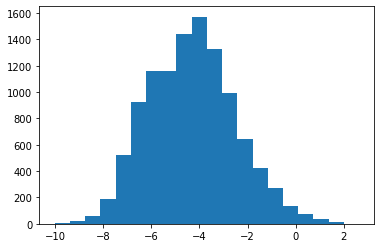

In [82]:
plt.hist(submission_1, bins=20) #, range=(0,1))
plt.show()

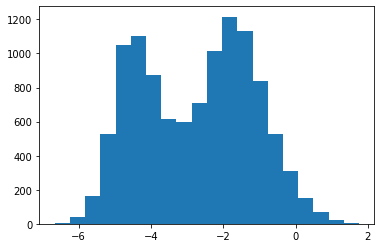

In [83]:
plt.hist(submission_2, bins=20) #, range=(0,1))
plt.show()

In [84]:
testing_df["target"] = submission_2 #predictions
submission_df = testing_df[["image_name", "target"]]

submission_df.to_csv("submission_6.csv", index=False)

In [ ]:
submission_df.head()

In [85]:
testing_df["target"] = submission_1 #predictions
submission_df = testing_df[["image_name", "target"]]

submission_df.to_csv("submission_7.csv", index=False)